In [1]:
# Automatically reload custom code modules when there are changes:
%load_ext autoreload
%autoreload 2


In [2]:
# Adjust relative path so that the notebook can find the code modules:
import sys
sys.path.append('code/')


In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib notebook


In [4]:
# Import code modules:
from structures import *
from animations import Animation


In [5]:
# Hide warnings about safe distance violation (still in development):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


<IPython.core.display.Javascript object>


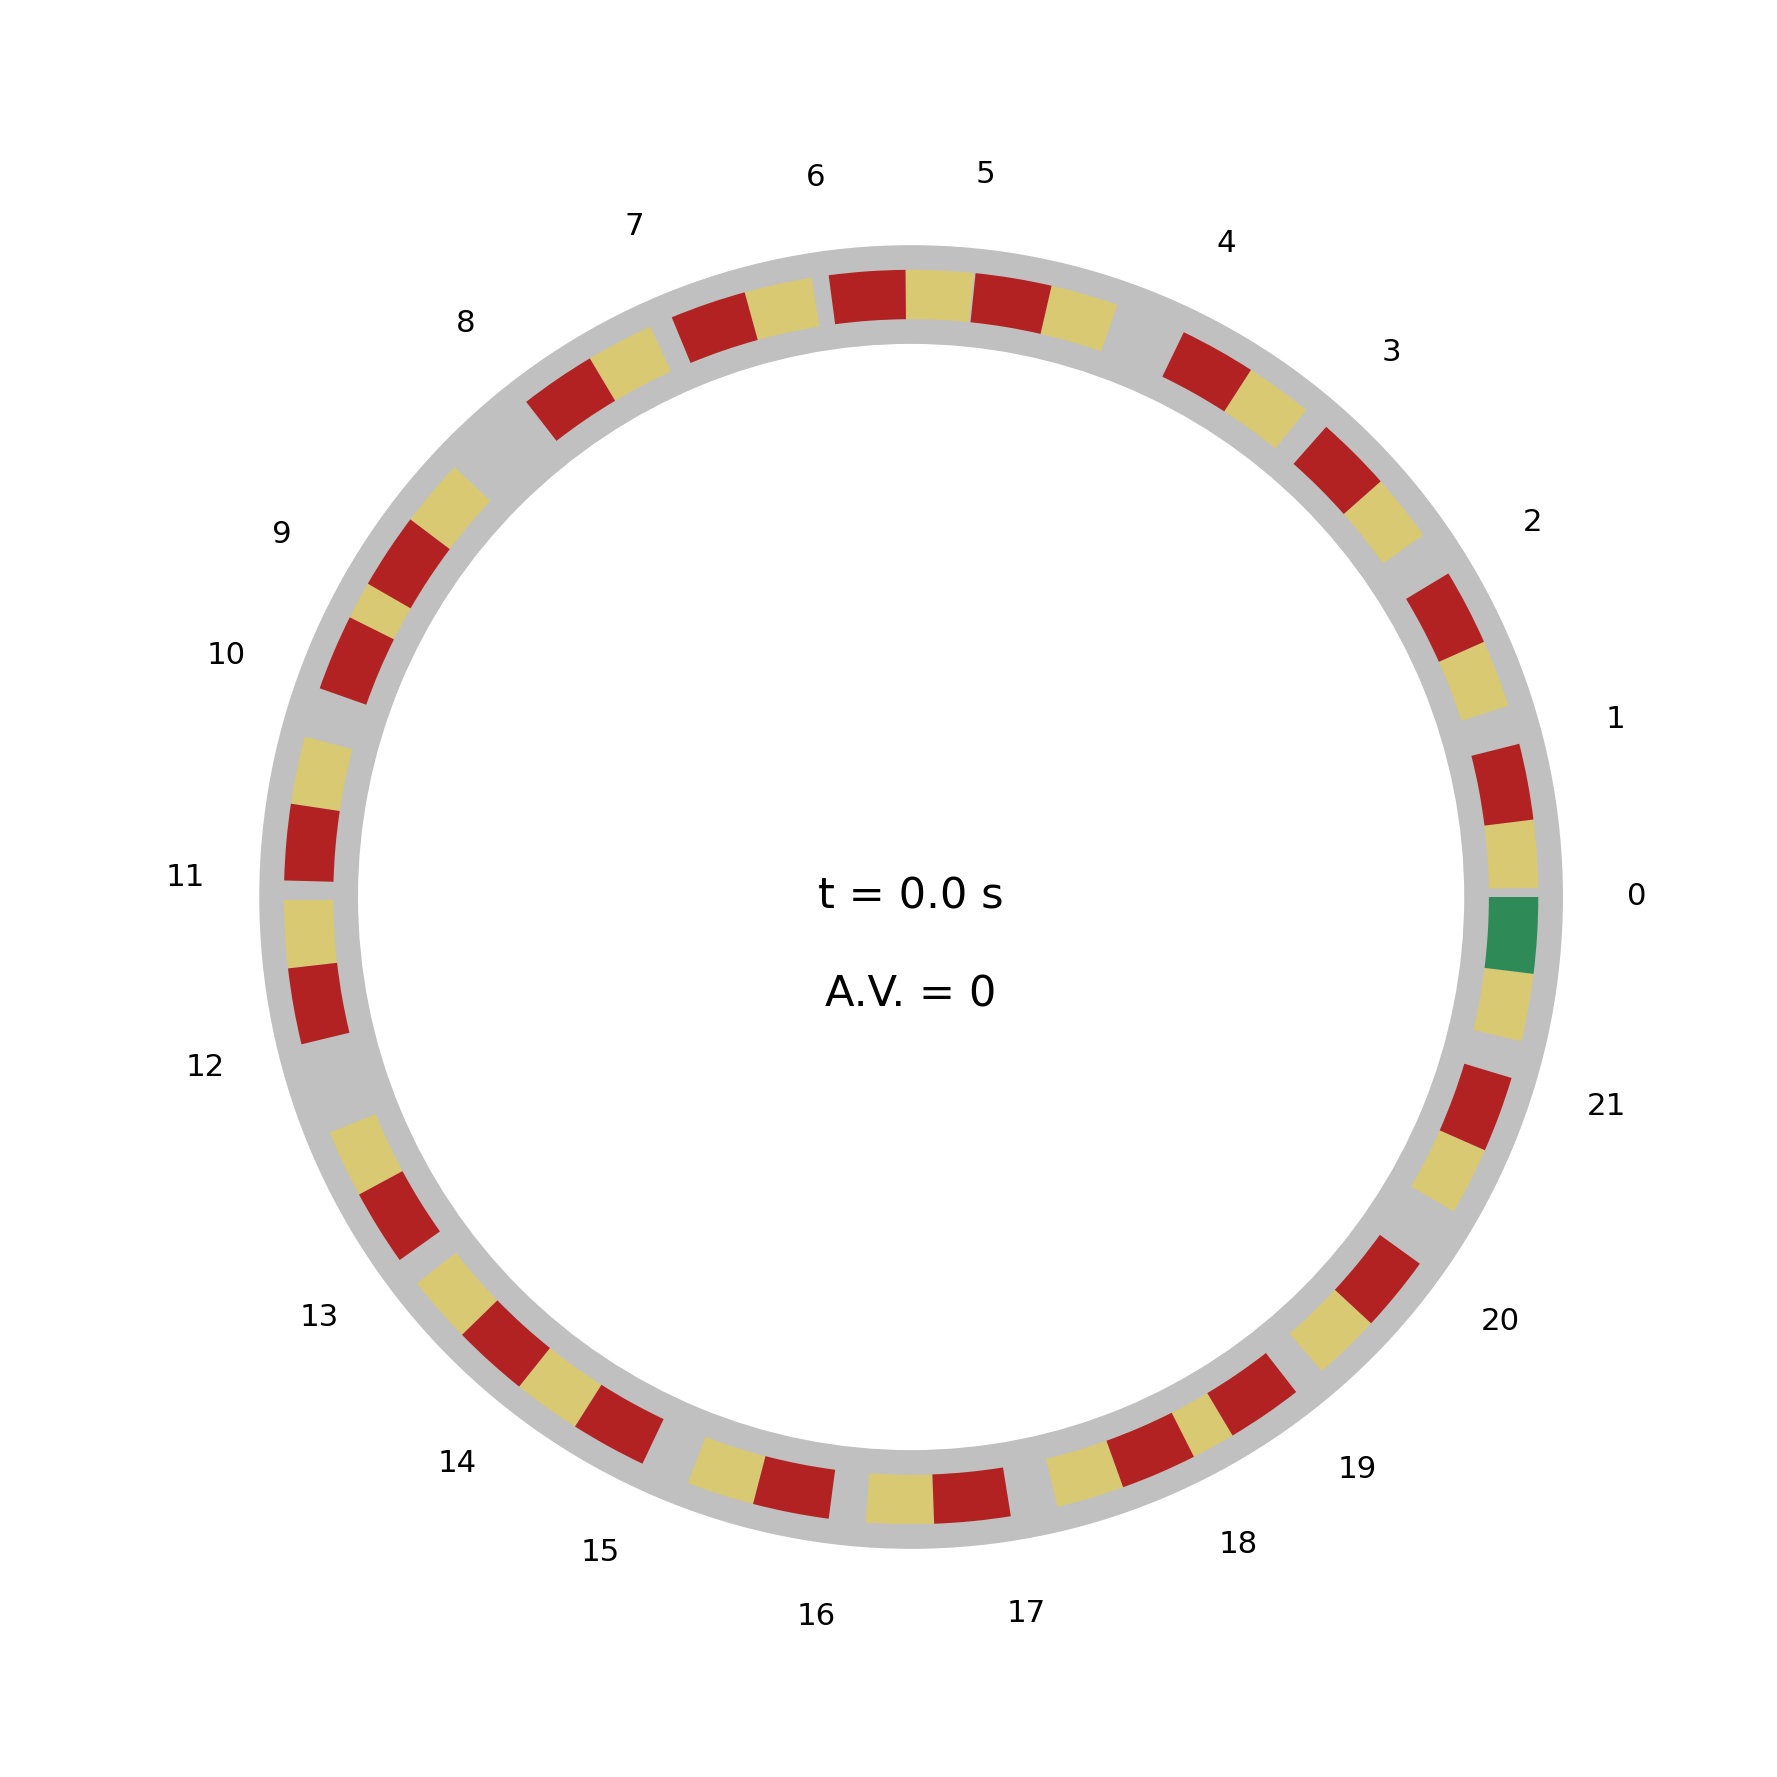

In [6]:
# Define a ring road environment:
env = RingRoad(
    num_vehicles = 22,  # The vechicles at index 0 is an A.V.
    ring_length = 230.0,  # The road is a cicle.
    starting_noise = 4.0,  # Uniformly add noise to starting positions.
    temporal_res = 0.3,  # Set the size of simulation steps (seconds).
    av_activate = 30,  # Set when the PID controller is activated.
    seed = 286,  # Set a random seed.
)

# Plot initial conditions:
fig,ax = env.plot_ring(step=0, draw_cars_to_scale=True, draw_safety_buffer=True)


In [7]:
# Run the simulation for set number of time steps:
total_time = 50  # In seconds.
total_steps = int(np.ceil(total_time/env.dt))
env.run(steps=total_steps)


<IPython.core.display.Javascript object>


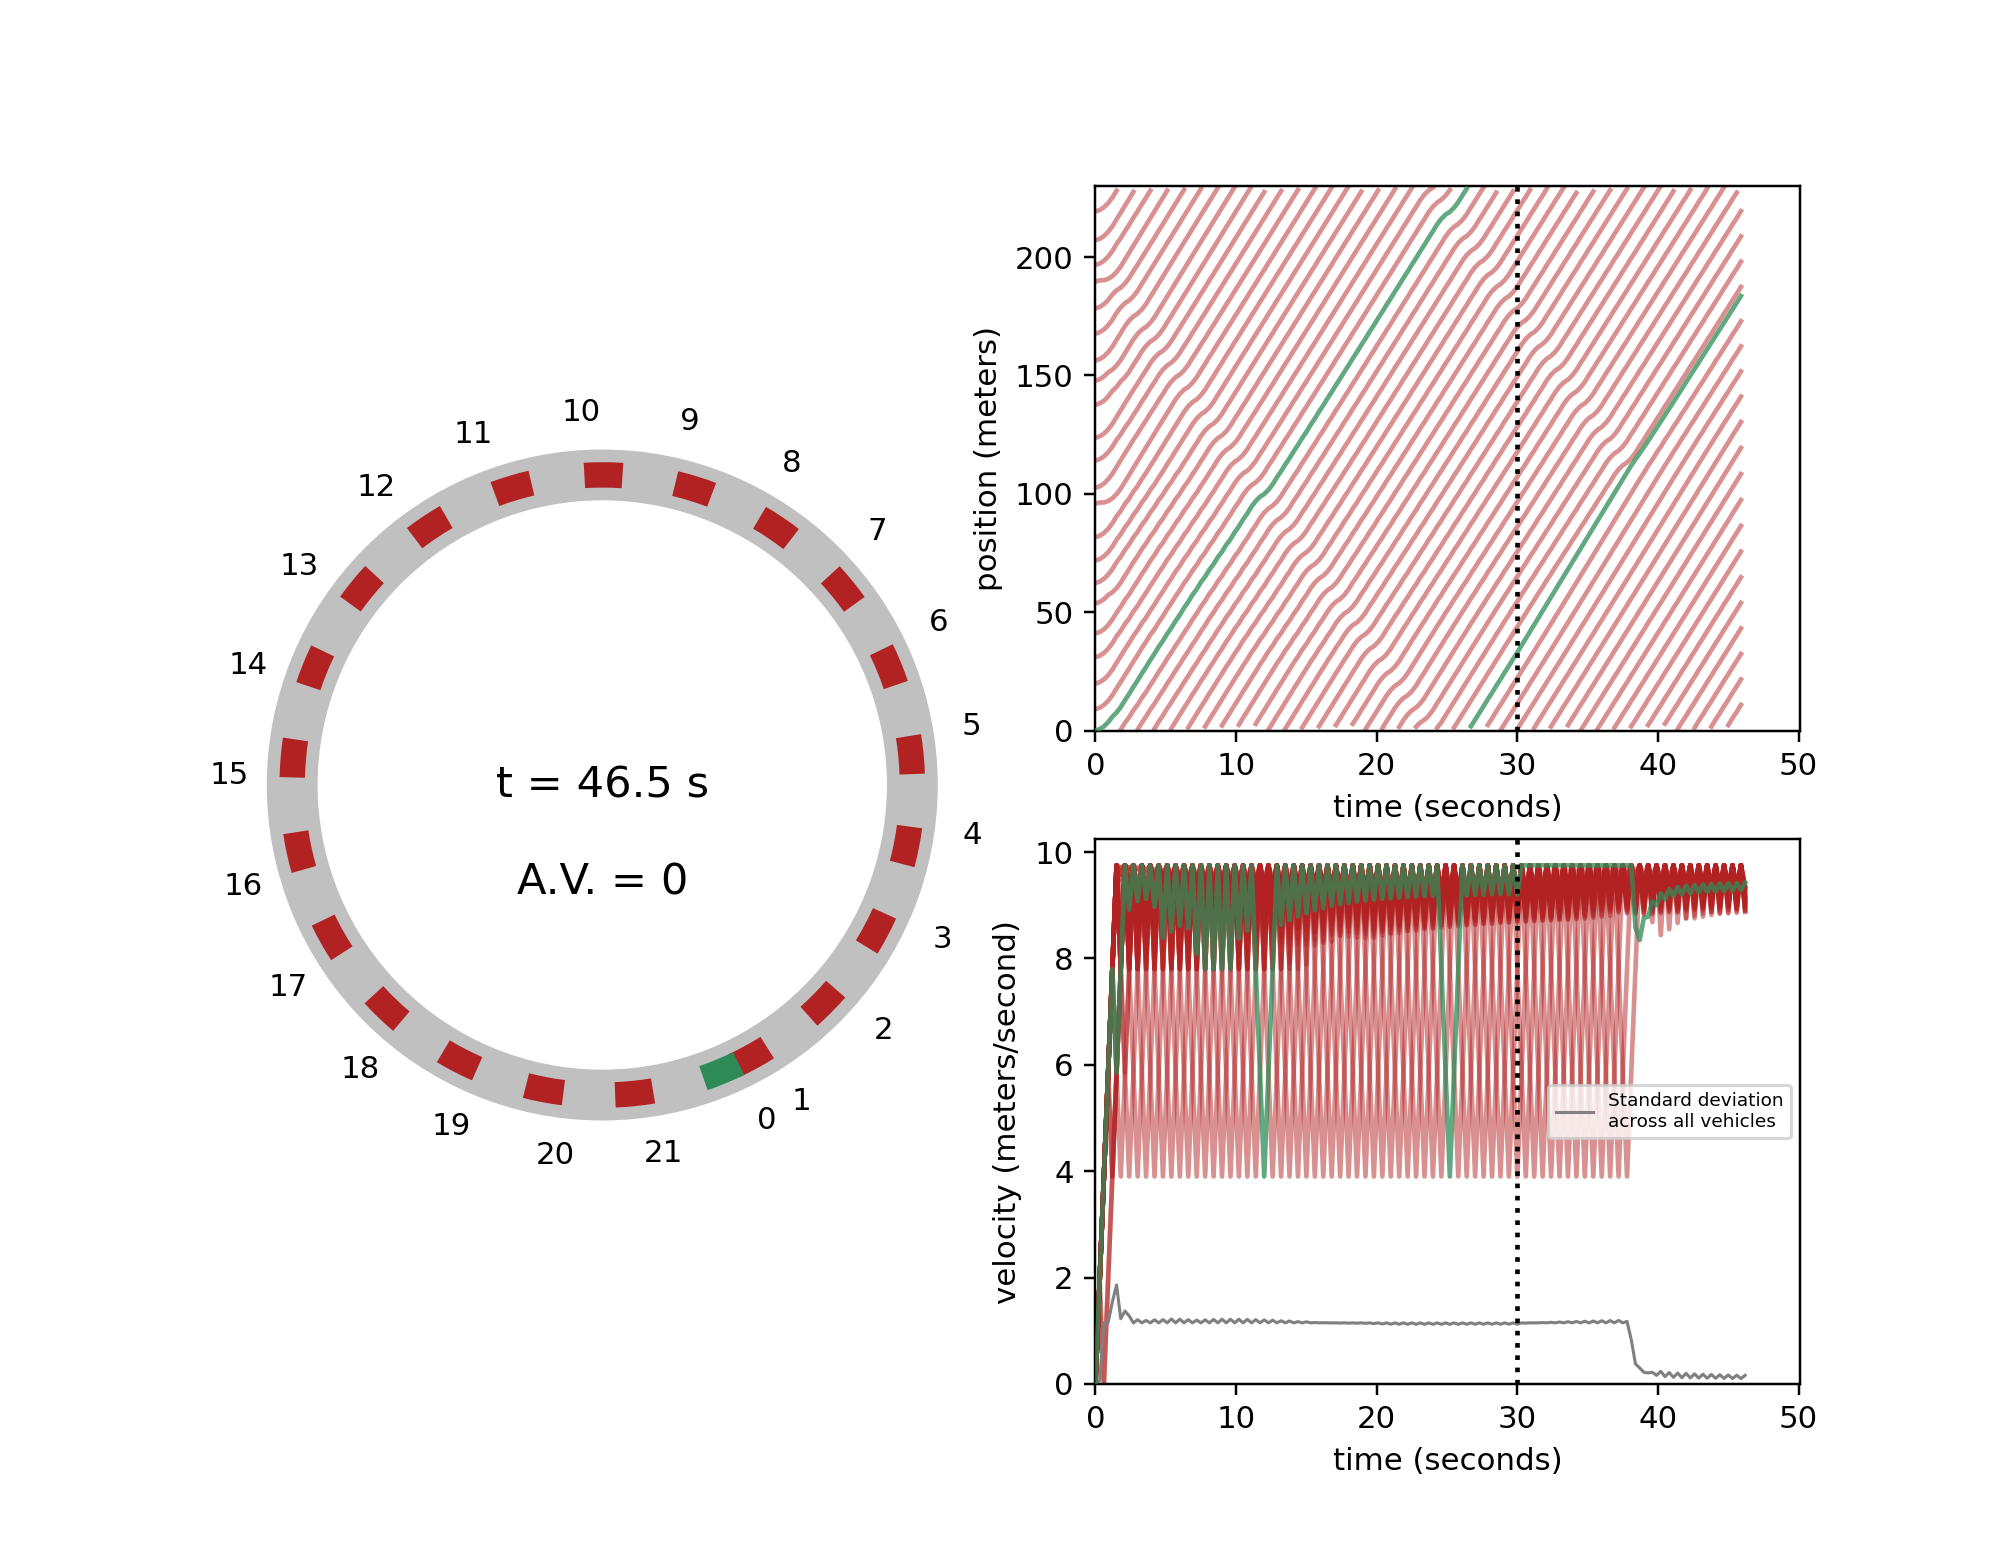

In [8]:
# Build animation:
anim = Animation(env, speedup=5.0, interval=5)
anim.animate_dashboard(draw_cars_to_scale=True, draw_safety_buffer=False, show_sigma=True)

# Show animation:
anim.show()


In [9]:
# Save animation as GIF (may take a few minutes -- pauses preview above):
anim.save_gif(filepath="outputs/baseline.gif", overwrite=True)


Saved : outputs/baseline.gif .


In [10]:
# Deactivate interactive plotting mode (ends preview above):
# anim.stop()
